In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 확인

In [3]:
df = pd.read_csv('corporateCreditRatingWithFinancialRatios.csv', dtype={'CIK': str, 'SIC Code': int})

df.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   object 
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   int32  
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

## 기본 전처리

### 칼럼명 정리 - snake_case

In [4]:
import re

In [5]:
cols = list(map(lambda x: re.sub(r'[\s/-]', '_', x.lower()), df.columns))
cols = list(map(lambda x: re.sub(r'_+', '_', x), cols))

cols

['rating_agency',
 'corporation',
 'rating',
 'rating_date',
 'cik',
 'binary_rating',
 'sic_code',
 'sector',
 'ticker',
 'current_ratio',
 'long_term_debt_capital',
 'debt_equity_ratio',
 'gross_margin',
 'operating_margin',
 'ebit_margin',
 'ebitda_margin',
 'pre_tax_profit_margin',
 'net_profit_margin',
 'asset_turnover',
 'roe_return_on_equity',
 'return_on_tangible_equity',
 'roa_return_on_assets',
 'roi_return_on_investment',
 'operating_cash_flow_per_share',
 'free_cash_flow_per_share']

In [6]:
df.columns = cols

In [49]:
df.head()

,rating_agency,corporation,rating,rating_date,cik,binary_rating,sic_code,sector,ticker,current_ratio,...,ebitda_margin,pre_tax_profit_margin,net_profit_margin,asset_turnover,roe_return_on_equity,return_on_tangible_equity,roa_return_on_assets,roi_return_on_investment,operating_cash_flow_per_share,free_cash_flow_per_share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


## 범주형 데이터

### 종속 변수 - df_y

In [7]:
grades = df['rating'].unique()
grades

array(['A-', 'AAA', 'BBB-', 'AA-', 'A', 'BBB+', 'BBB', 'BB', 'B', 'BB+',
       'B+', 'BB-', 'B-', 'A+', 'CCC', 'AA', 'CCC+', 'CC', 'C', 'CCC-',
       'AA+', 'D', 'CC+'], dtype=object)

In [8]:
sorted_grades = []

for c in 'ABCD':
    for i in range(3, 0, -1):
        for op in ['+', '', '-']:
            grade = c*i+op
            if grade in grades:
                sorted_grades.append(grade)
sorted_grades

['AAA',
 'AA+',
 'AA',
 'AA-',
 'A+',
 'A',
 'A-',
 'BBB+',
 'BBB',
 'BBB-',
 'BB+',
 'BB',
 'BB-',
 'B+',
 'B',
 'B-',
 'CCC+',
 'CCC',
 'CCC-',
 'CC+',
 'CC',
 'C',
 'D']

In [9]:
g_sc_dict = {}

for i, e in enumerate(sorted_grades[::-1]):
    g_sc_dict[e] = i

g_sc_dict

{'D': 0,
 'C': 1,
 'CC': 2,
 'CC+': 3,
 'CCC-': 4,
 'CCC': 5,
 'CCC+': 6,
 'B-': 7,
 'B': 8,
 'B+': 9,
 'BB-': 10,
 'BB': 11,
 'BB+': 12,
 'BBB-': 13,
 'BBB': 14,
 'BBB+': 15,
 'A-': 16,
 'A': 17,
 'A+': 18,
 'AA-': 19,
 'AA': 20,
 'AA+': 21,
 'AAA': 22}

In [10]:
df['rating_int_23'] = df['rating'].map(g_sc_dict)

In [134]:
df['rating'].value_counts()

rating
BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: count, dtype: int64

In [11]:
# C등급 이하는 합친다
df['rating_int_17'] = df['rating_int_23'].apply(lambda x: max(x-6, 0))

sorted(df['rating_int_17'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [12]:
df_y = df[['rating', 'rating_int_17', 'rating_int_23']]

### 회사 식별 정보 - cik
1. corporation
2. ticker
3. cik

In [137]:
df_names = df[['corporation', 'ticker', 'cik']]

df_names

,corporation,ticker,cik
0,American States Water Co.,AWR,1056903
1,Automatic Data Processing Inc.,ADP,8670
2,Avnet Inc.,AVT,8858
3,California Water Service Co.,CWT,1035201
4,Cardinal Health Inc.,CAH,721371
...,...,...,...
7800,"eBay, Inc.",EBAY,1065088
7801,"eBay, Inc.",EBAY,1065088
7802,iHeartCommunications Inc.,CCU,739708
7803,iHeartCommunications Inc.,CCU,739708


In [138]:
for k in df_names:
    unq_len = len(df_names[k].unique())
    print(k, unq_len, sep=': ')

corporation: 1377
ticker: 678
cik: 686


In [139]:
ticker_df = df_names.groupby("ticker").agg({"corporation": pd.Series.nunique, "cik": pd.Series.nunique})

In [140]:
ticker_df[ticker_df['cik'] > 1].index

Index(['BKR', 'EME', 'ENDP', 'ENR', 'FTI', 'KRO', 'SWX', 'WPP'], dtype='object', name='ticker')

In [141]:
check = []
for idx in df_names.index:
    if df_names.loc[idx, 'ticker'] in ['BKR', 'EME', 'ENDP', 'ENR', 'FTI', 'KRO', 'SWX', 'WPP']:
        check.append(df_names.loc[idx, :])

df_chk_name = pd.DataFrame(check).sort_values('ticker')

In [142]:
df_chk_name[['ticker', 'cik', 'corporation']]

,ticker,cik,corporation
3039,BKR,1701605,BAKER HUGHES INCORPORATED
3036,BKR,1701605,BAKER HUGHES INCORPORATED
1570,BKR,1701605,BAKER HUGHES INCORPORATED
1569,BKR,1701605,BAKER HUGHES INCORPORATED
4007,BKR,9263,Michael Baker International LLC
...,...,...,...
4730,WPP,806968,WPP CP LLC
4729,WPP,806968,WPP CP LLC
4728,WPP,806968,WPP CP LLC
6771,WPP,806968,WPP PLC


회사를 식별하는 코드로서 cik를 사용. 나머지는 부정확
- sic_code - 회사를 식별하는 "코드"이므로 string 으로 변환

In [13]:
df['sic_code'] = df['sic_code'].astype('str')

### 산업 분류 - df_cate
- Sector, SIC-CODE

<Axes: xlabel='sector'>

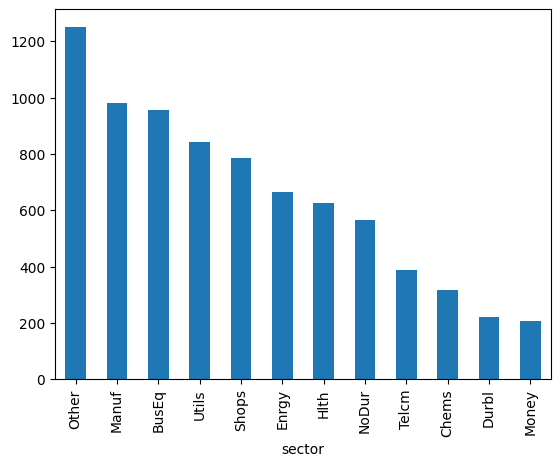

In [63]:
df.sector.value_counts().plot.bar()

<Axes: xlabel='sic_code'>

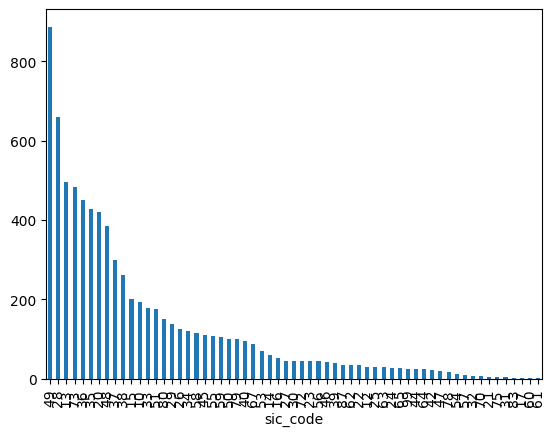

In [64]:
df.sic_code.apply(lambda x: x[:2]).value_counts().plot.bar()

<Axes: xlabel='sic_code'>

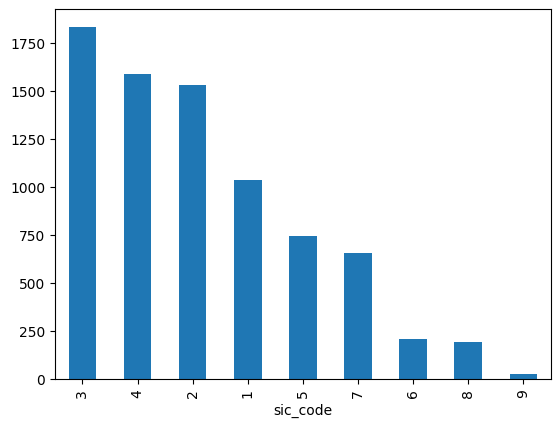

In [65]:
df.sic_code.apply(lambda x: x[:1]).value_counts().plot.bar()

In [14]:
df['sic_1'] = df.sic_code.apply(lambda x: x[:1])

In [67]:
pd.DataFrame(df.groupby(['sic_1']).apply(lambda x: x['sector'].unique()), columns=['Sector'])

,Sector
sic_1,
1,"[Other, NoDur, Enrgy]"
2,"[NoDur, Chems, Hlth, Manuf, Enrgy, Other, Durbl]"
3,"[Manuf, BusEq, Hlth, Durbl, NoDur]"
4,"[Utils, Other, Telcm]"
5,[Shops]
6,[Money]
7,"[BusEq, Other, Shops]"
8,"[Hlth, Other]"
9,[Other]


In [68]:
pd.DataFrame(df.groupby(['sector']).apply(lambda x: sorted(set([str(v)[:1] for v in x['sic_code'].unique()]))), columns=['SIC-2'])

,SIC-2
sector,
BusEq,"[3, 7]"
Chems,[2]
Durbl,"[2, 3]"
Enrgy,"[1, 2]"
Hlth,"[2, 3, 8]"
Manuf,"[2, 3]"
Money,[6]
NoDur,"[1, 2, 3]"
Other,"[1, 2, 4, 7, 8, 9]"


In [69]:
pd.DataFrame(df.groupby(['sector']).apply(lambda x: sorted(set([str(v)[:2] for v in x['sic_code'].unique()]))), columns=['SIC-2'])

,SIC-2
sector,
BusEq,"[35, 36, 38, 73]"
Chems,[28]
Durbl,"[25, 36, 37, 39]"
Enrgy,"[12, 13, 29]"
Hlth,"[28, 38, 80]"
Manuf,"[25, 26, 30, 32, 33, 34, 35, 36, 37]"
Money,"[60, 61, 62, 63, 64, 65, 67]"
NoDur,"[10, 20, 21, 22, 23, 27, 31, 39]"
Other,"[10, 14, 15, 16, 17, 24, 40, 42, 44, 45, 46, 4..."


In [145]:
df_cate = df[['sector', 'sic_1']]
df_cate

,sector,sic_1
0,Utils,4
1,BusEq,7
2,Shops,5
3,Utils,4
4,Shops,5
...,...,...
7800,BusEq,7
7801,BusEq,7
7802,Telcm,4
7803,Telcm,4


## 수치형 데이터 - df_log

In [70]:
# 수치형 데이터가 많아서 일단 object 타입 제외하고 확인
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   binary_rating                  7805 non-null   int64  
 1   current_ratio                  7805 non-null   float64
 2   long_term_debt_capital         7805 non-null   float64
 3   debt_equity_ratio              7805 non-null   float64
 4   gross_margin                   7805 non-null   float64
 5   operating_margin               7805 non-null   float64
 6   ebit_margin                    7805 non-null   float64
 7   ebitda_margin                  7805 non-null   float64
 8   pre_tax_profit_margin          7805 non-null   float64
 9   net_profit_margin              7805 non-null   float64
 10  asset_turnover                 7805 non-null   float64
 11  roe_return_on_equity           7805 non-null   float64
 12  return_on_tangible_equity      7805 non-null   f

In [71]:
df.select_dtypes(exclude=['object', 'int64', 'int32']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current_ratio                  7805 non-null   float64
 1   long_term_debt_capital         7805 non-null   float64
 2   debt_equity_ratio              7805 non-null   float64
 3   gross_margin                   7805 non-null   float64
 4   operating_margin               7805 non-null   float64
 5   ebit_margin                    7805 non-null   float64
 6   ebitda_margin                  7805 non-null   float64
 7   pre_tax_profit_margin          7805 non-null   float64
 8   net_profit_margin              7805 non-null   float64
 9   asset_turnover                 7805 non-null   float64
 10  roe_return_on_equity           7805 non-null   float64
 11  return_on_tangible_equity      7805 non-null   float64
 12  roa_return_on_assets           7805 non-null   f

In [15]:
df_floats = df.select_dtypes(exclude=['object', 'int64', 'int32'])

- 섹터별 재무 비율
- SIC별 재무 비율


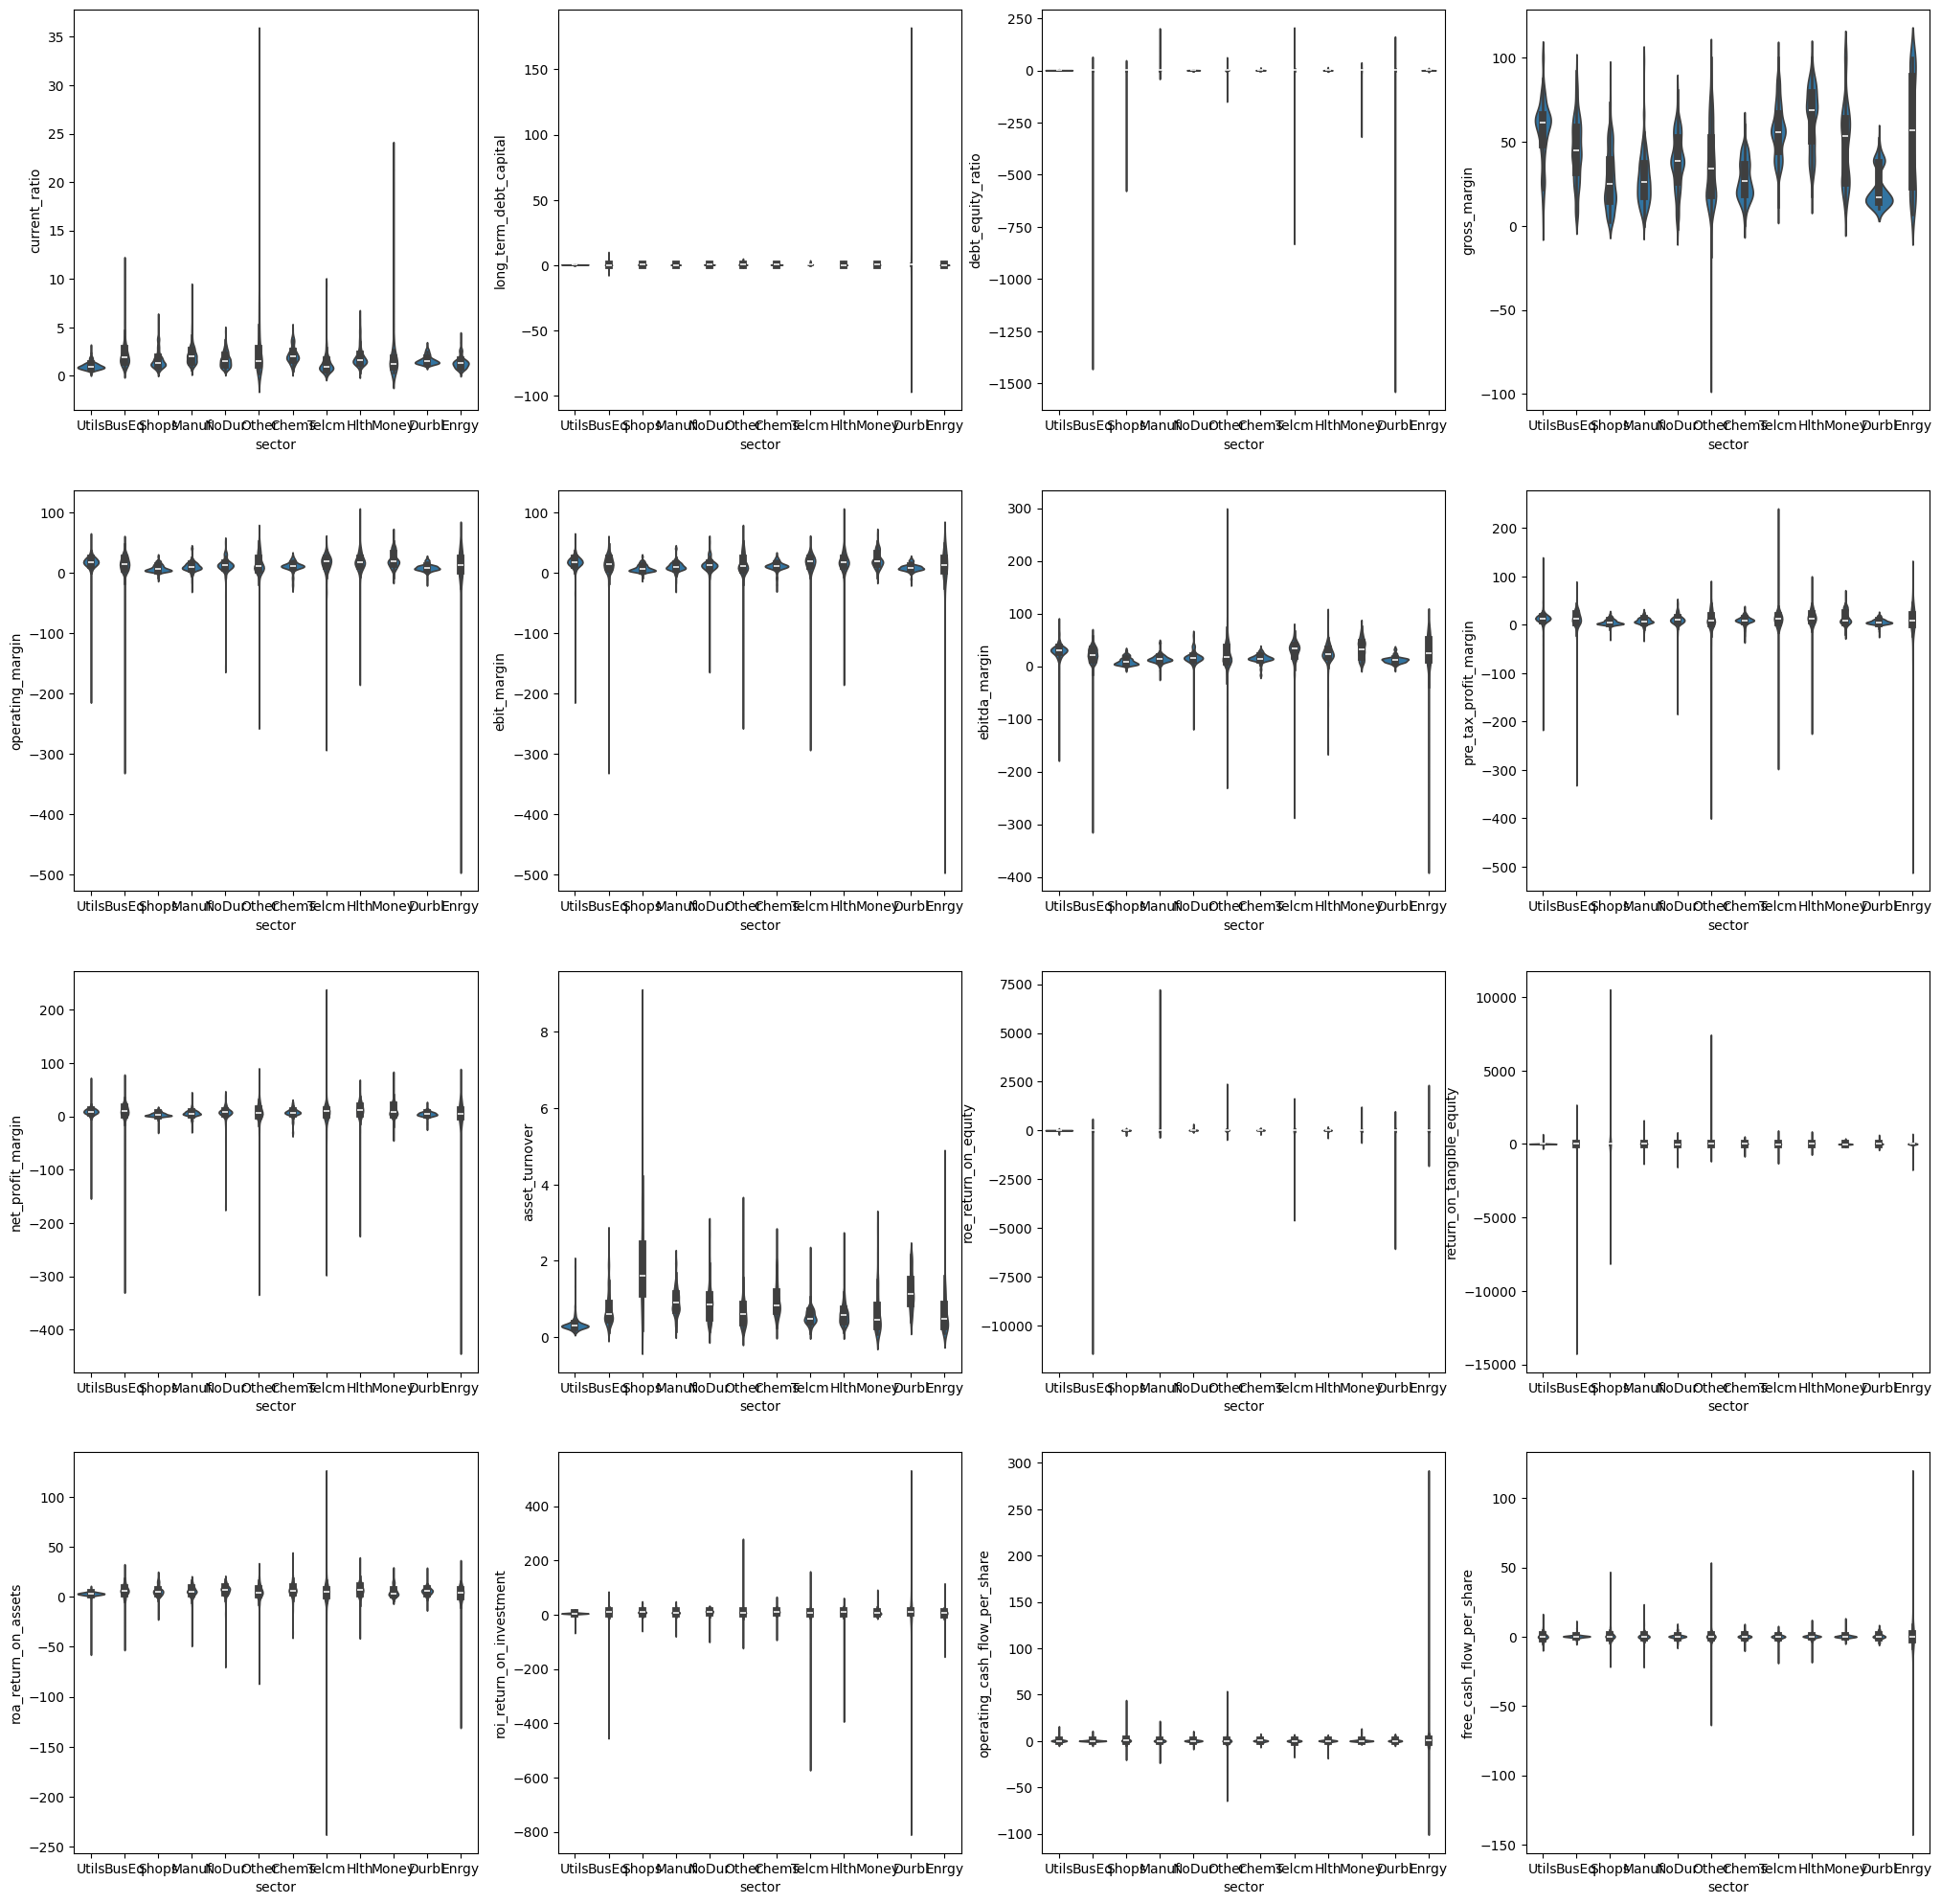

In [73]:
fig_size = 25
plt.figure(figsize=(fig_size, fig_size))

for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.violinplot(data=df, x='sector', y=df_floats.columns[i])

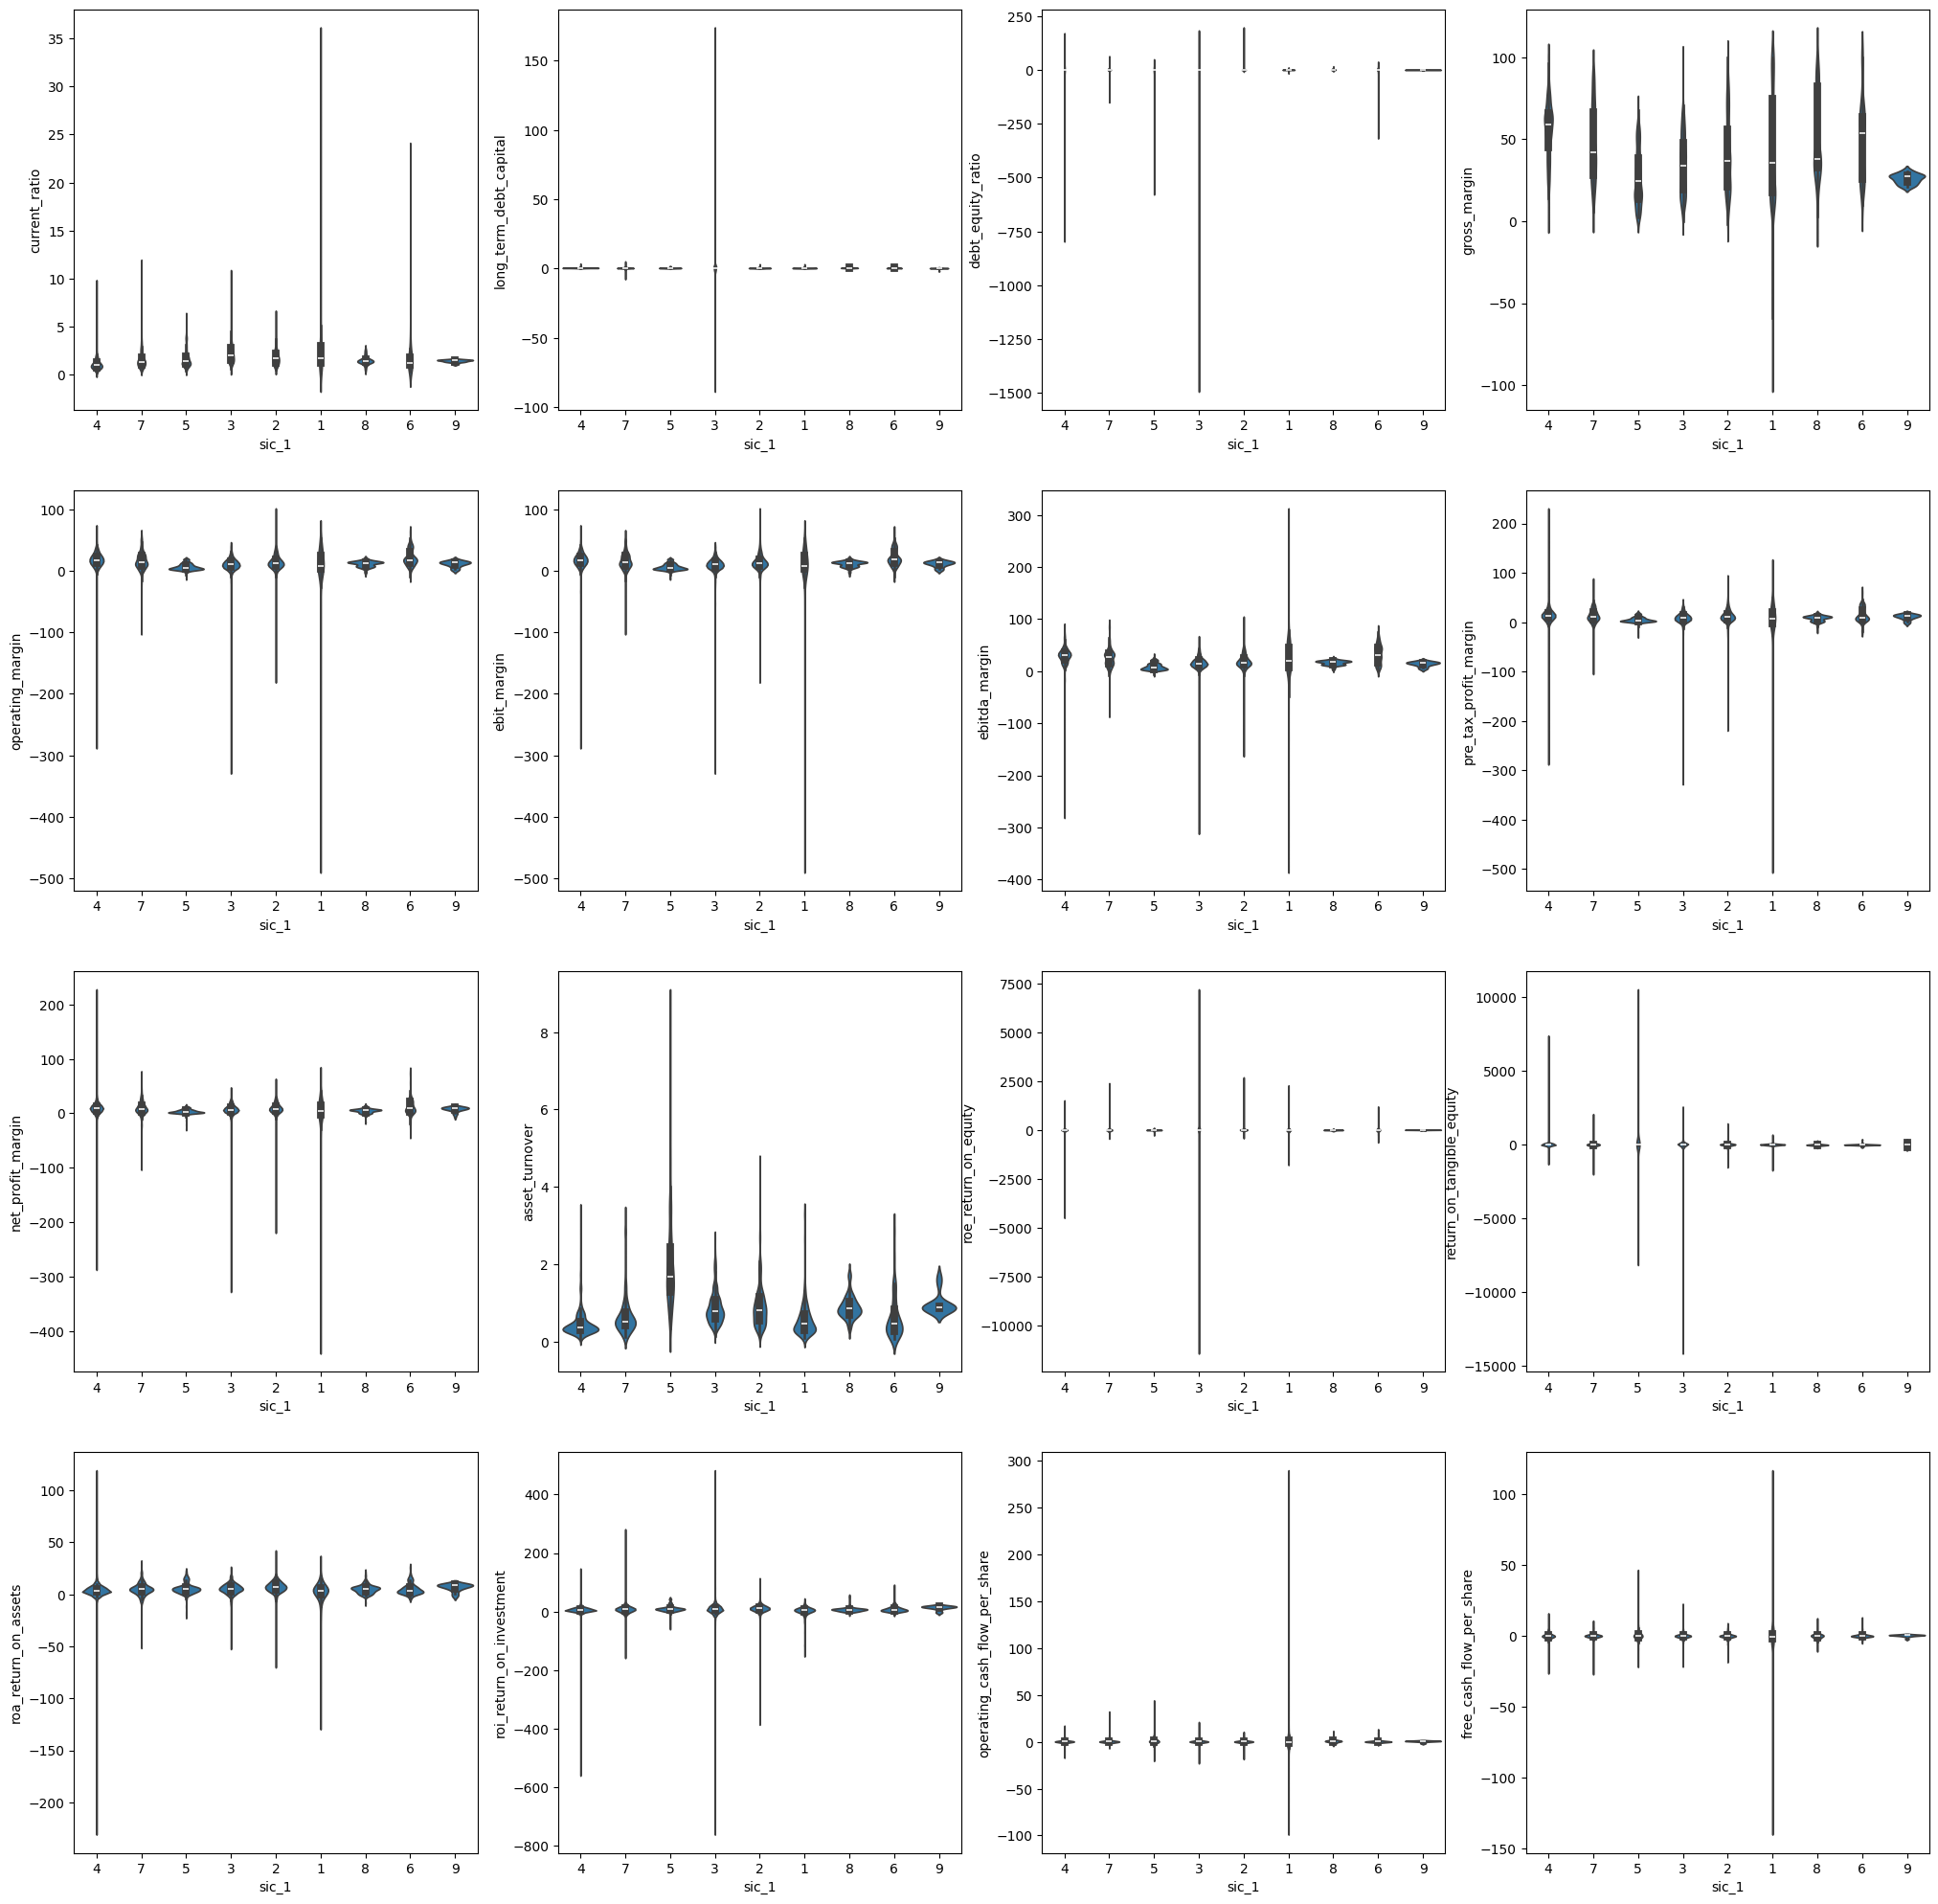

In [74]:
fig_size = 25
plt.figure(figsize=(fig_size, fig_size))

for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.violinplot(data=df, x='sic_1', y=df_floats.columns[i])

전반적으로 꼬리가 길다. 스케일링 필요 !
- StandardScaler, MinMaxScaler, RobustScaler
- Log Scaling

In [147]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [88]:
def scaler_compare(col_num, col_idx):
    # plt.figure(figsize=(25, 3*col_num))

    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    titles = ['std', 'mm', 'rb']

    row_val = col_idx*5

    plt.subplot(col_num, 5, row_val+1)
    plt.gca().set_title('ori')
    sns.histplot(df_floats.iloc[:, col_idx])

    for i in range(3):
        plt.subplot(col_num, 5, row_val+i+2)
        plt.gca().set_title(titles[i])
        X = np.array(df_floats.iloc[:, col_idx]).reshape(-1, 1)
        sns.histplot(scalers[i].fit_transform(X), legend=False)

    plt.subplot(col_num, 5, row_val+5)
    plt.gca().set_title('log')
    sns.histplot(np.log1p(df_floats.iloc[:, col_idx]))

    return


c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jjkha\anaconda3\envs\week4\Lib\site-packages\pandas

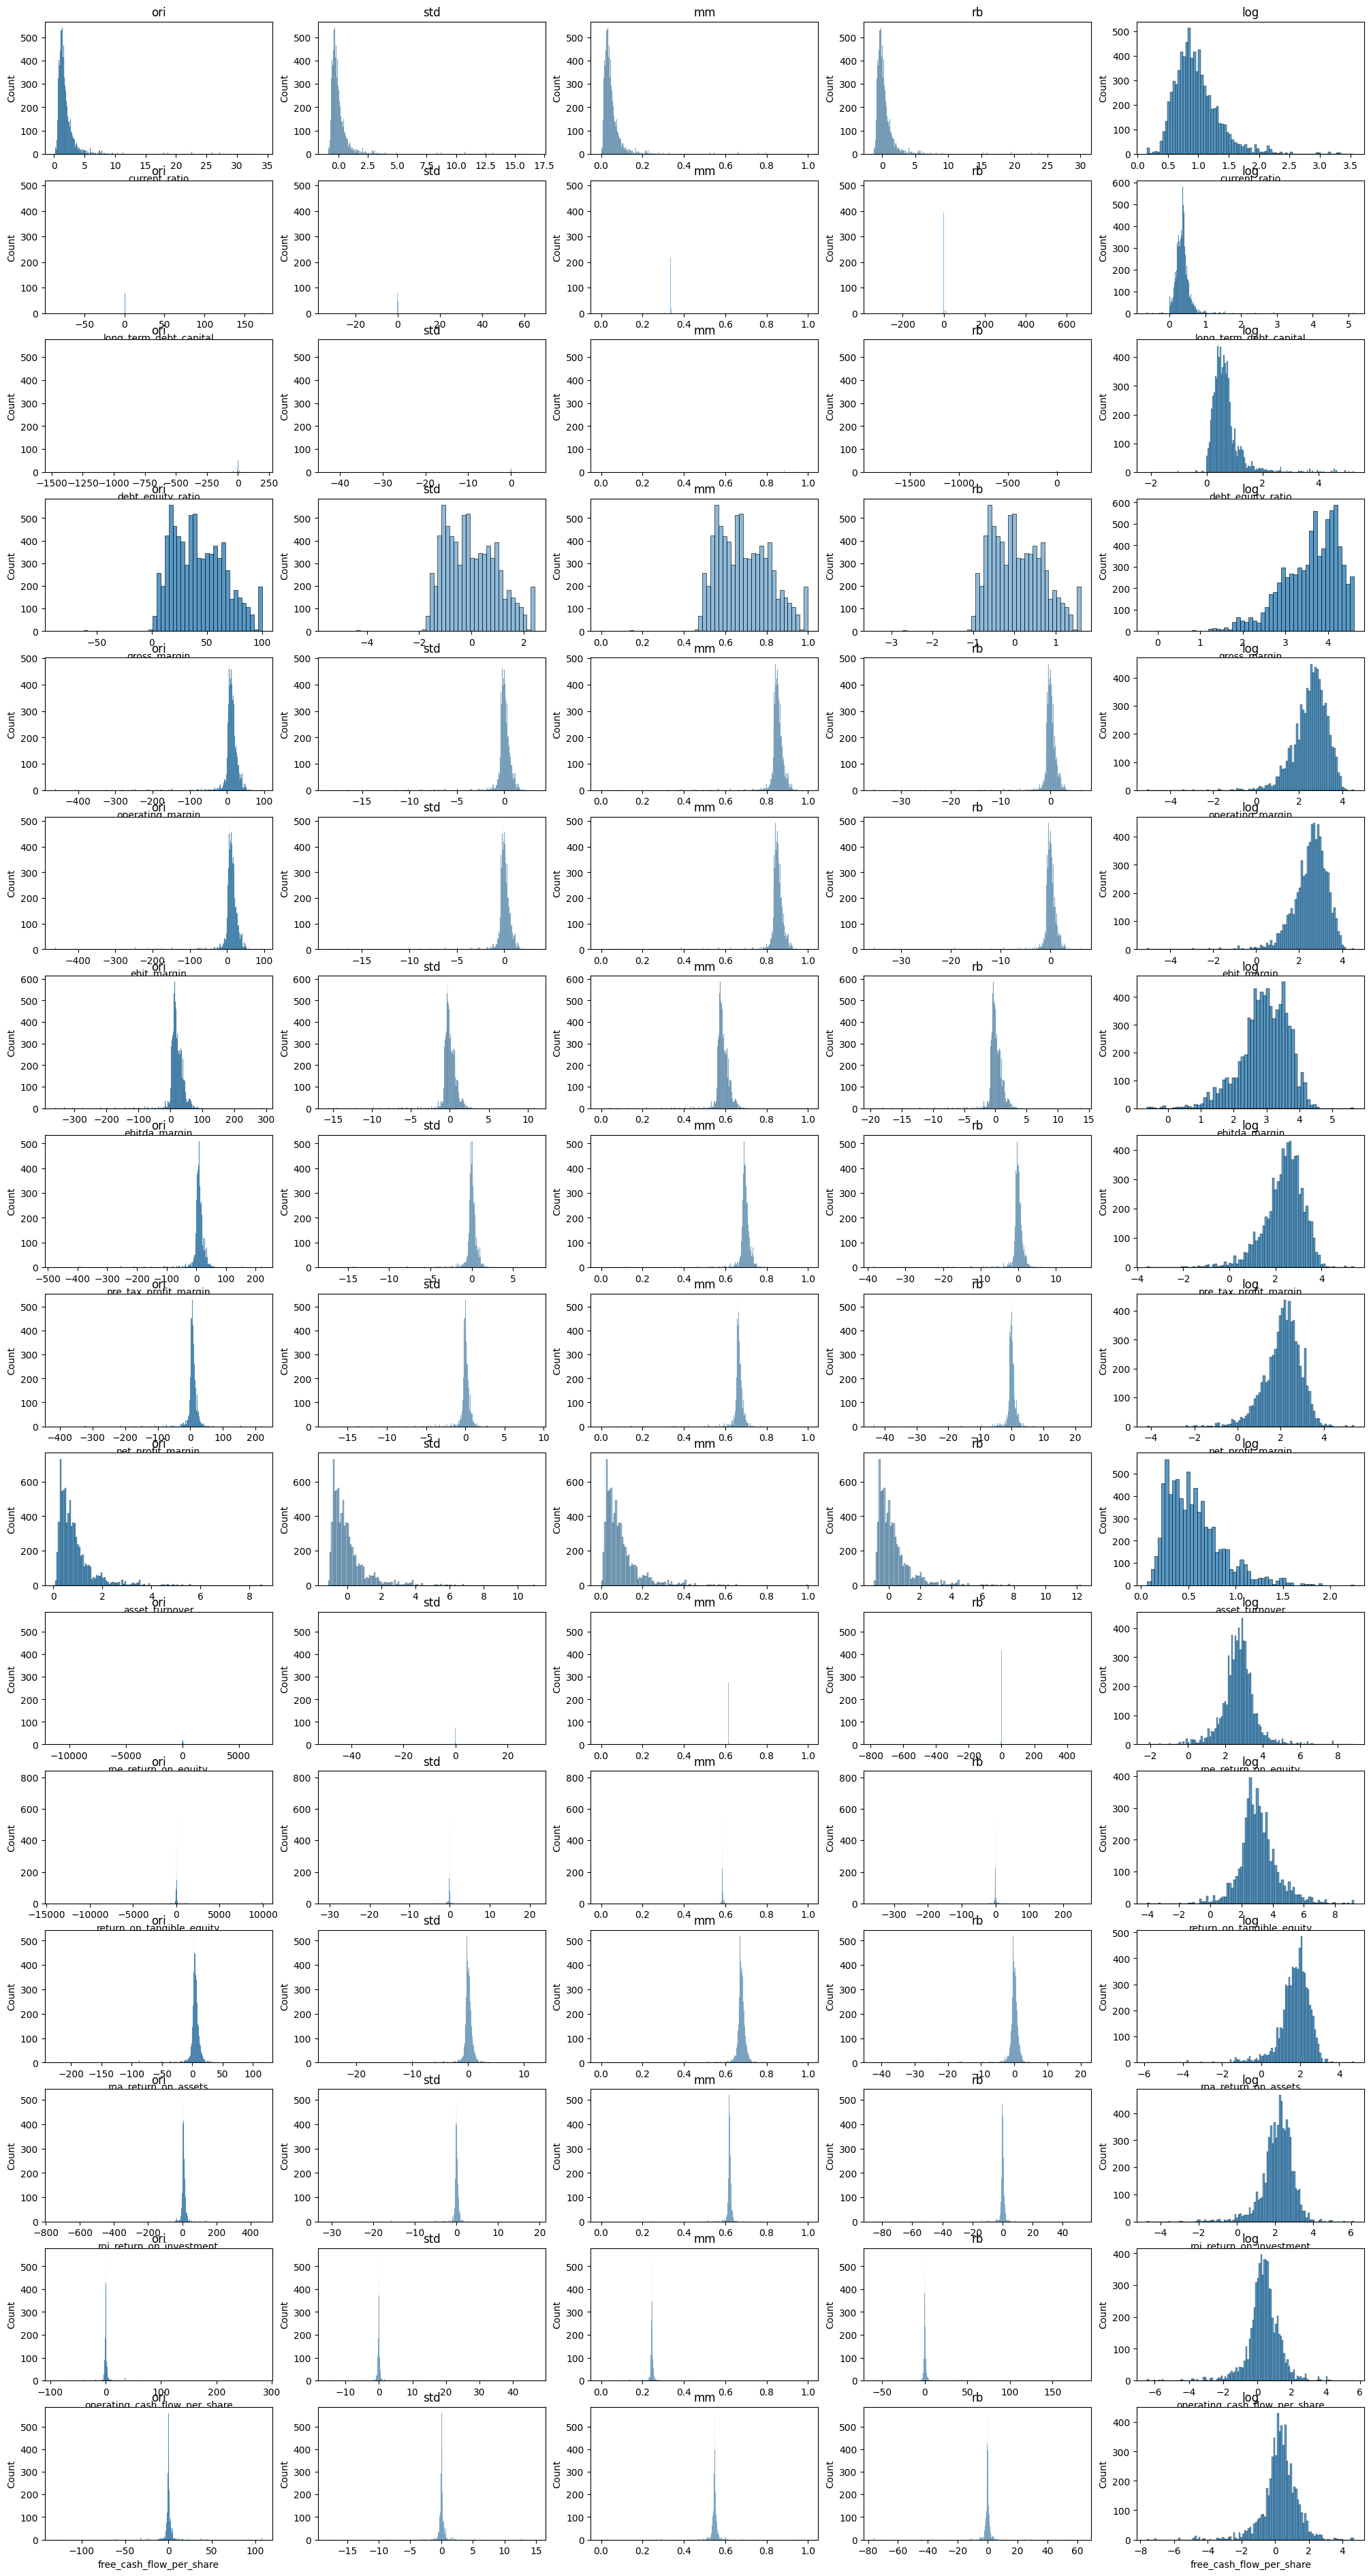

In [89]:
col_num = 16

plt.figure(figsize=(25, 3*col_num))

for i in range(col_num):
    scaler_compare(col_num, i)


# for i in range(col_num):
#     print(i, df_floats.columns[i])
#     try:
#         scaler_compare(col_num, i)
#     except RuntimeWarning:
#         print(i, 'RuntimeWarning')
#     except Exception as exp:
#         print(i, type(exp), exp, sep=': ')

음수, 양수 분리 -> 로그 변환

In [91]:
df_floats.columns

Index(['current_ratio', 'long_term_debt_capital', 'debt_equity_ratio',
       'gross_margin', 'operating_margin', 'ebit_margin', 'ebitda_margin',
       'pre_tax_profit_margin', 'net_profit_margin', 'asset_turnover',
       'roe_return_on_equity', 'return_on_tangible_equity',
       'roa_return_on_assets', 'roi_return_on_investment',
       'operating_cash_flow_per_share', 'free_cash_flow_per_share'],
      dtype='object')

In [148]:
df_pos_neg = pd.DataFrame()

for col in df_floats.columns:
    # df_temp[col] = df[col]
    # df[col+'_pos'] = df[col].apply(lambda x: x if x >= 0 else 0)
    # df[col+'_neg'] = df[col].apply(lambda x: -x if x < 0 else 0)
    df_pos_neg[col+'_pos'] = df_floats[col].apply(lambda x: x if x >= 0 else 0)
    df_pos_neg[col+'_neg'] = df_floats[col].apply(lambda x: -x if x < 0 else 0)

df_pos_neg


,current_ratio_pos,current_ratio_neg,long_term_debt_capital_pos,long_term_debt_capital_neg,debt_equity_ratio_pos,debt_equity_ratio_neg,gross_margin_pos,gross_margin_neg,operating_margin_pos,operating_margin_neg,...,return_on_tangible_equity_pos,return_on_tangible_equity_neg,roa_return_on_assets_pos,roa_return_on_assets_neg,roi_return_on_investment_pos,roi_return_on_investment_neg,operating_cash_flow_per_share_pos,operating_cash_flow_per_share_neg,free_cash_flow_per_share_pos,free_cash_flow_per_share_neg
0,1.1507,0,0.4551,0.0,0.8847,0.0,77.6230,0.0,19.4839,0.0,...,8.1978,0.0,2.6385,0.0,4.4530,0.0,1.9957,0.0000,0.0000,0.1333
1,1.1129,0,0.0072,0.0,0.0073,0.0,43.6619,0.0,19.8327,0.0,...,47.2858,0.0,4.4944,0.0,21.8765,0.0,0.2501,0.0000,0.3132,0.0000
2,1.9276,0,0.2924,0.0,0.4255,0.0,11.9008,0.0,3.3173,0.0,...,16.7991,0.0,5.2731,0.0,9.6494,0.0,0.0000,7.6079,0.0000,7.3231
3,0.8358,0,0.4708,0.0,0.9491,0.0,64.5096,0.0,18.4549,0.0,...,9.7015,0.0,2.6583,0.0,5.1018,0.0,1.7438,0.0000,0.0000,0.8999
4,1.2931,0,0.2644,0.0,0.4036,0.0,3.8385,0.0,1.3269,0.0,...,19.4184,0.0,2.9364,0.0,8.1844,0.0,1.9725,0.0000,2.4174,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,3.4927,0,0.5065,0.0,1.0263,0.0,79.3878,0.0,25.5703,0.0,...,95.6757,0.0,10.9659,0.0,14.6116,0.0,0.0000,1.2323,0.0000,1.2826
7801,3.4927,0,0.5065,0.0,1.0263,0.0,79.3878,0.0,25.5703,0.0,...,95.6757,0.0,10.9659,0.0,14.6116,0.0,0.0000,1.2323,0.0000,1.2826
7802,1.7606,0,0.1034,0.0,0.1523,0.0,54.2787,0.0,14.2454,0.0,...,13.5108,0.0,7.7070,0.0,10.6101,0.0,0.0907,0.0000,1.2552,0.0000
7803,1.7606,0,0.1034,0.0,0.1523,0.0,54.2787,0.0,14.2454,0.0,...,13.5108,0.0,7.7070,0.0,10.6101,0.0,0.0907,0.0000,1.2552,0.0000


In [149]:
df_log = df_pos_neg.map(lambda x: np.log1p(x))
df_log

,current_ratio_pos,current_ratio_neg,long_term_debt_capital_pos,long_term_debt_capital_neg,debt_equity_ratio_pos,debt_equity_ratio_neg,gross_margin_pos,gross_margin_neg,operating_margin_pos,operating_margin_neg,...,return_on_tangible_equity_pos,return_on_tangible_equity_neg,roa_return_on_assets_pos,roa_return_on_assets_neg,roi_return_on_investment_pos,roi_return_on_investment_neg,operating_cash_flow_per_share_pos,operating_cash_flow_per_share_neg,free_cash_flow_per_share_pos,free_cash_flow_per_share_neg
0,0.765793,0.0,0.375075,0.0,0.633769,0.0,4.364664,0.0,3.019639,0.0,...,2.218964,0.0,1.291572,0.0,1.696166,0.0,1.097178,0.000000,0.000000,0.125134
1,0.748061,0.0,0.007174,0.0,0.007273,0.0,3.799121,0.0,3.036524,0.0,...,3.877138,0.0,1.703729,0.0,3.130110,0.0,0.223224,0.000000,0.272467,0.000000
2,1.074183,0.0,0.256501,0.0,0.354523,0.0,2.557289,0.0,1.462630,0.0,...,2.879148,0.0,1.836271,0.0,2.365504,0.0,0.000000,2.152680,0.000000,2.119035
3,0.607480,0.0,0.385806,0.0,0.667368,0.0,4.182197,0.0,2.968099,0.0,...,2.370384,0.0,1.296999,0.0,1.808584,0.0,1.009344,0.000000,0.000000,0.641801
4,0.829905,0.0,0.234598,0.0,0.339040,0.0,1.576605,0.0,0.844537,0.0,...,3.016436,0.0,1.370267,0.0,2.217506,0.0,1.089403,0.000000,1.228880,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1.502454,0.0,0.409789,0.0,0.706211,0.0,4.386862,0.0,3.279794,0.0,...,4.571362,0.0,2.482061,0.0,2.748014,0.0,0.000000,0.803032,0.000000,0.825315
7801,1.502454,0.0,0.409789,0.0,0.706211,0.0,4.386862,0.0,3.279794,0.0,...,4.571362,0.0,2.482061,0.0,2.748014,0.0,0.000000,0.803032,0.000000,0.825315
7802,1.015448,0.0,0.098396,0.0,0.141760,0.0,4.012388,0.0,2.724278,0.0,...,2.674893,0.0,2.164127,0.0,2.451875,0.0,0.086820,0.000000,0.813239,0.000000
7803,1.015448,0.0,0.098396,0.0,0.141760,0.0,4.012388,0.0,2.724278,0.0,...,2.674893,0.0,2.164127,0.0,2.451875,0.0,0.086820,0.000000,0.813239,0.000000


상관관계 확인

<Axes: >

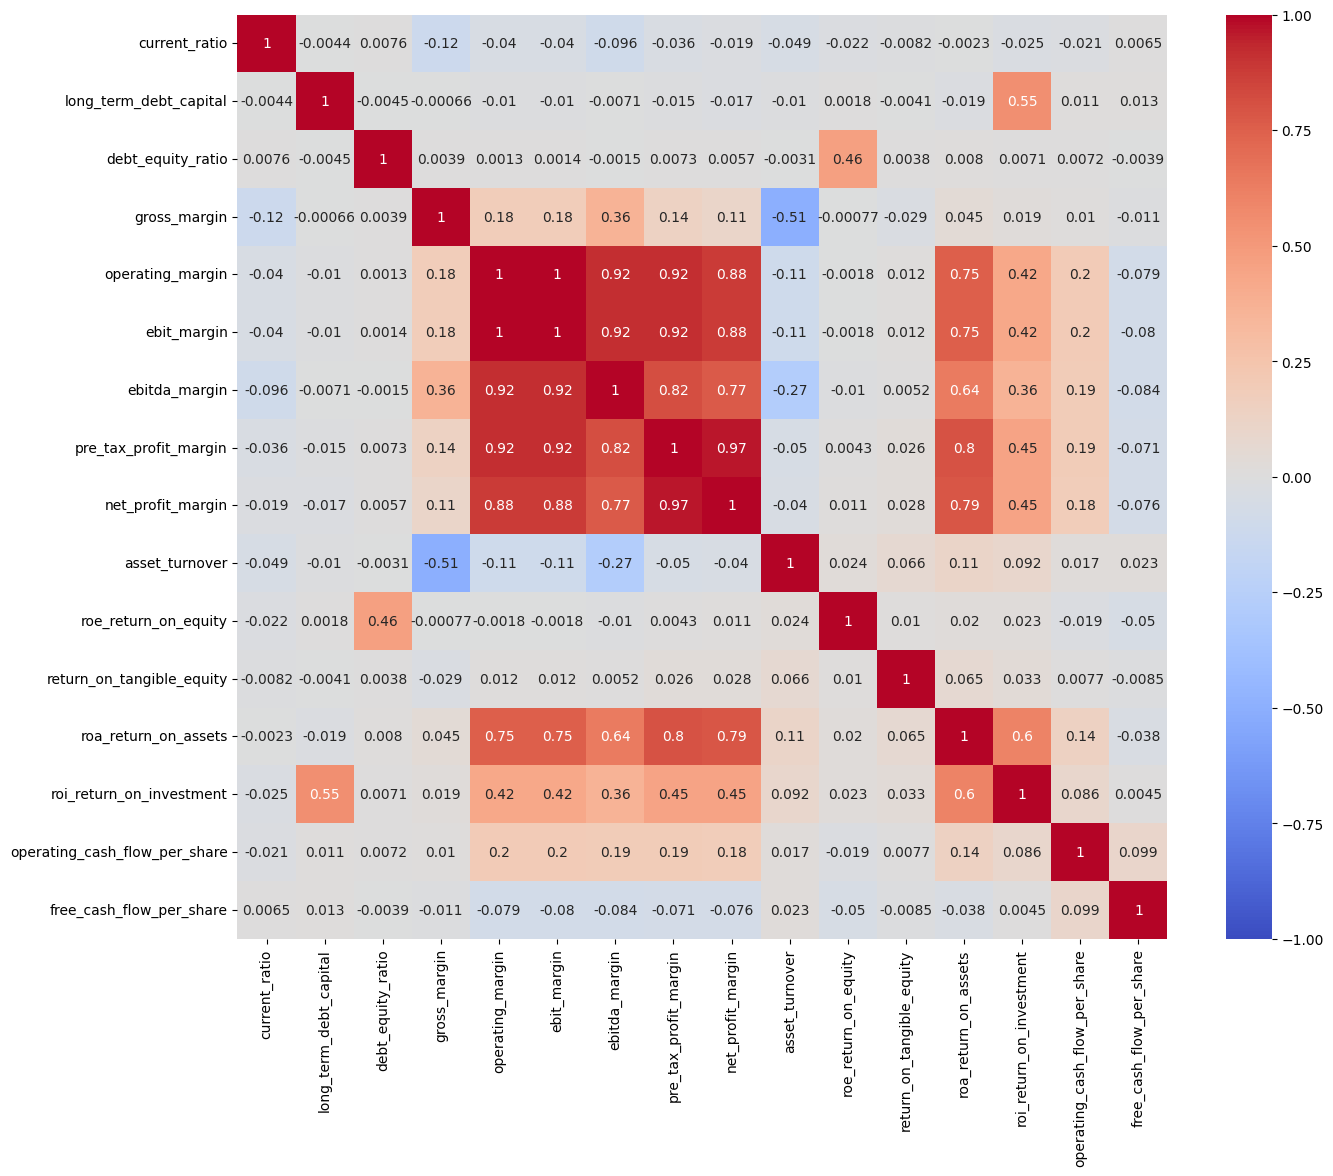

In [23]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_floats.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 데이터 취합

In [154]:
# df['cik'] + df_cate + df_log + df_y
df_re = df[['cik']].join(df_cate).join(df_log).join(df_y)

In [155]:
df_re.columns

Index(['cik', 'sector', 'sic_1', 'current_ratio_pos', 'current_ratio_neg',
       'long_term_debt_capital_pos', 'long_term_debt_capital_neg',
       'debt_equity_ratio_pos', 'debt_equity_ratio_neg', 'gross_margin_pos',
       'gross_margin_neg', 'operating_margin_pos', 'operating_margin_neg',
       'ebit_margin_pos', 'ebit_margin_neg', 'ebitda_margin_pos',
       'ebitda_margin_neg', 'pre_tax_profit_margin_pos',
       'pre_tax_profit_margin_neg', 'net_profit_margin_pos',
       'net_profit_margin_neg', 'asset_turnover_pos', 'asset_turnover_neg',
       'roe_return_on_equity_pos', 'roe_return_on_equity_neg',
       'return_on_tangible_equity_pos', 'return_on_tangible_equity_neg',
       'roa_return_on_assets_pos', 'roa_return_on_assets_neg',
       'roi_return_on_investment_pos', 'roi_return_on_investment_neg',
       'operating_cash_flow_per_share_pos',
       'operating_cash_flow_per_share_neg', 'free_cash_flow_per_share_pos',
       'free_cash_flow_per_share_neg', 'rating', 'rating

In [156]:
df_re.to_csv('CorporateCredit(preprocessed).csv')